In [119]:
import import_ipynb
from Json2Graph import json_to_graph
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import community
from matplotlib import pyplot as plt
%matplotlib inline

importing Jupyter notebook from Json2Graph.ipynb


In [120]:
G = json_to_graph('data/dataset_20180403/180331_Herbert_Heim.json')

In [121]:
print('Weighted Degree:')
print(G.degree(weight='weight'))
print('Degree:')
print(G.degree())
print('Weighted In-Degree:')
print(G.in_degree(weight='weight'))
print('In-Degree:')
print(G.in_degree())
print('Weighted Out-Degree:')
print(G.out_degree(weight='weight'))
print('Out-Degree:')
print(G.out_degree(G))

Weighted Degree:
[(0, 4), (1, 3), (2, -5), (3, 0), (4, 2), (5, -2), (6, 0), (7, 6)]
Degree:
[(0, 2), (1, 4), (2, 3), (3, 2), (4, 3), (5, 1), (6, 2), (7, 3)]
Weighted In-Degree:
[(0, 0), (1, 4), (2, -3), (3, -2), (4, 3), (5, 0), (6, -2), (7, 4)]
In-Degree:
[(0, 0), (1, 2), (2, 2), (3, 1), (4, 2), (5, 0), (6, 1), (7, 2)]
Weighted Out-Degree:
[(0, 4), (1, -1), (2, -2), (3, 2), (4, -1), (5, -2), (6, 2), (7, 2)]
Out-Degree:
[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [122]:
from networkx.algorithms import approximation as ap

print('all_pairs_node_connectivity: {}'.format(ap.all_pairs_node_connectivity(G)))
print('node_connectivity: {}'.format(ap.node_connectivity(G)))
#ap.k_components(G) - only undirected
print('max_clique: {}'.format(ap.max_clique(G)))
#ap.average_clustering(G) - only undirected
#ap.min_weighted_dominating_set(G, weight='weight') - only undirected
print('maximum_independent_set: {}'.format(ap.maximum_independent_set(G)))
print('min_maximal_matching: {}'.format(ap.min_maximal_matching(G)))
print('ramsey_R2: {}'.format(ap.ramsey_R2(G)))
#ap.metric_closure(G, weight='weight') - only undirected
print('min_weighted_vertex_cover: {}'.format(ap.min_weighted_vertex_cover(G, weight='weight')))

all_pairs_node_connectivity: {0: {1: 2, 2: 2, 3: 1, 4: 2, 5: 0, 6: 0, 7: 1}, 1: {0: 0, 2: 2, 3: 1, 4: 1, 5: 0, 6: 0, 7: 1}, 2: {0: 0, 1: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 1}, 3: {0: 0, 1: 1, 2: 1, 4: 1, 5: 0, 6: 0, 7: 1}, 4: {0: 0, 1: 1, 2: 1, 3: 1, 5: 0, 6: 0, 7: 1}, 5: {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 6: 1, 7: 1}, 6: {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 7: 1}, 7: {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0}}
node_connectivity: 0
max_clique: {0, 1, 4}
maximum_independent_set: {0, 2, 5, 7}
min_maximal_matching: {(0, 1), (2, 3), (5, 6)}
ramsey_R2: ({0, 1, 4}, {0, 2, 5, 7})
min_weighted_vertex_cover: {0, 1, 2, 3, 5, 6}


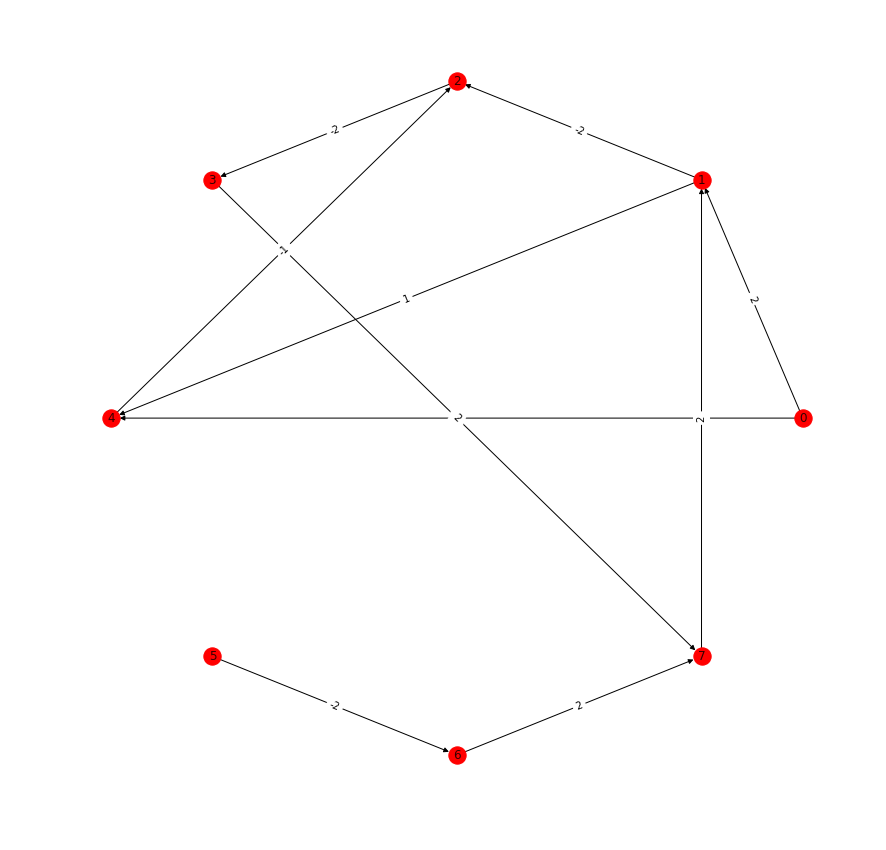

In [123]:
fig, ax = plt.subplots(figsize=(15, 15))
pos = nx.circular_layout(G, scale=1)
nx.draw(G, pos, font_size=12, with_labels=False, ax=ax)
edgelabels = nx.get_edge_attributes(G, 'weight')
edgelabels_2d = {}
for (n1, n2, n3), label in edgelabels.items():
    edgelabels_2d[(n1, n2)] = label
nx.draw_networkx_edge_labels(G, pos, edge_labels=edgelabels_2d)
nodelabels = nx.draw_networkx_labels(G, pos, alpha=.8)
